# Часть I: Исследование одной характеристики

Гипотезы:
- H0: выборки из распределения Г
- H1: выборки из нормального распределения Exp

Методы:
- KNN-граф → характеристика: Число компонент связности
- Distance-граф → характеристика: Хроматическое число


# Исследование зависимости числовой характеристики T от параметров распределений θ и υ


In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from src.data_generation import generate_sample
from src.graph_utils import (
    build_knn_graph,
    build_distance_graph,
    num_connected_components,
    chromatic_number_interval_graph
)

In [2]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
dist = 5
n_samples = 50
n_iter = 2000



avg_num_connected_components = []
for alpha in alphas:
    num_conn_components = []
    for _ in range(n_iter):
        data = generate_sample("gamma", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, dist)
        num_conn_components.append(num_connected_components(G))

    avg_num_connected_components.append(np.mean(num_conn_components))


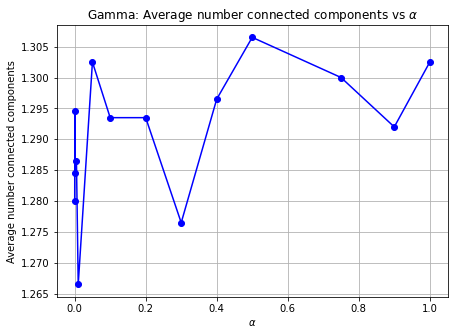

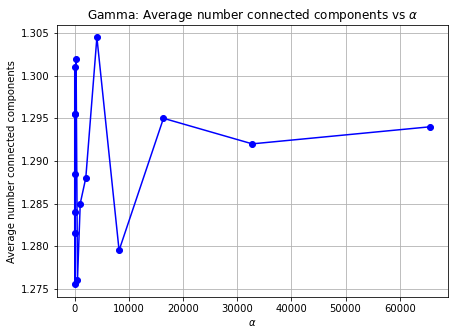

In [3]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_num_connected_components[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Gamma: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_num_connected_components[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Gamma: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()

In [4]:
avg_num_connected_components = []
for alpha in alphas:
    num_conn_components = []
    for _ in range(n_iter):
        data = generate_sample("exp", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, dist)
        num_conn_components.append(num_connected_components(G))

    avg_num_connected_components.append(np.mean(num_conn_components))

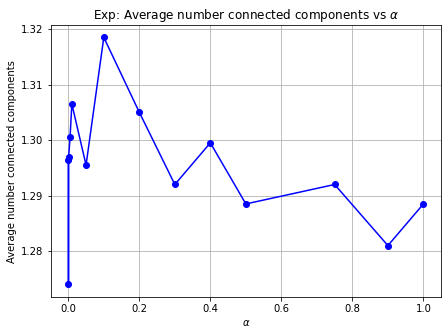

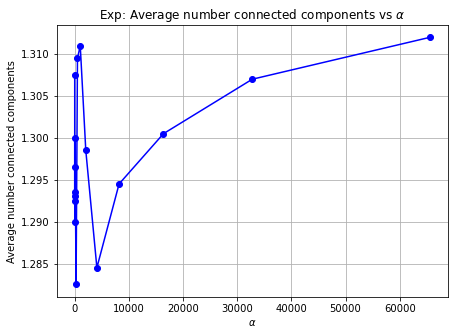

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_num_connected_components[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Exp: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_num_connected_components[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Exp: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()


In [6]:
avg_chromatic_number = []
for alpha in alphas:
    chromatic_number = []
    for _ in range(n_iter):
        data = generate_sample("gamma", alpha=alpha, size=n_samples)
        num_conn_components.append(chromatic_number_interval_graph(data, dist))

    avg_chromatic_number.append(np.mean(num_conn_components))


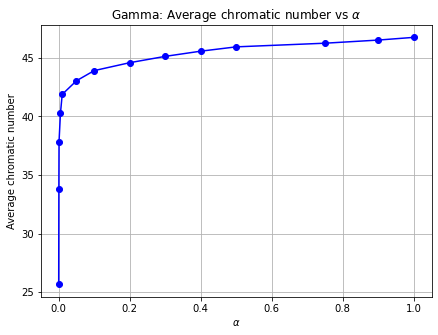

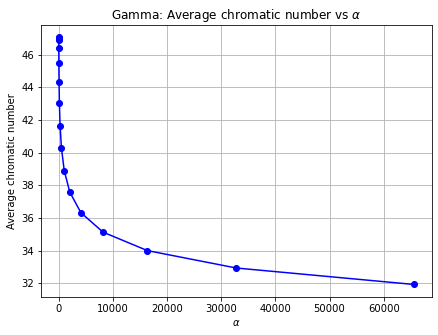

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_chromatic_number[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Gamma: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_chromatic_number[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Gamma: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()


In [8]:
avg_chromatic_number = []
for alpha in alphas:
    chromatic_number = []
    for _ in range(n_iter):
        data = generate_sample("exp", alpha=alpha, size=n_samples)
        num_conn_components.append(chromatic_number_interval_graph(data, dist))

    avg_chromatic_number.append(np.mean(num_conn_components))

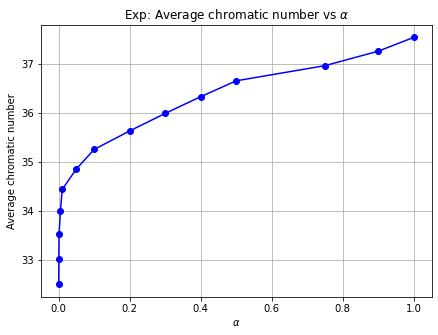

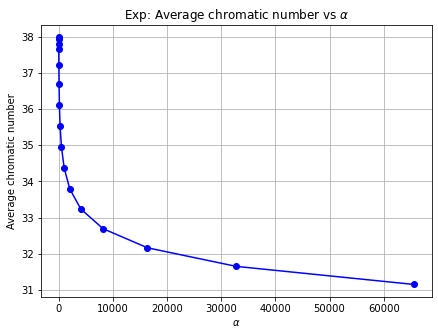

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_chromatic_number[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Exp: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_chromatic_number[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Exp: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()

In [10]:
alpha_gamma = (1/2)**0.5 
alpha_exp = 1
k_neighbours = [20, 25, 50, 75, 100, 150, 200, 250]
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100]
n_iter = 1000

def plot_grid_connected_components(dist_name, alpha):
    fig, axes = plt.subplots(
        nrows=len(n_samples),
        ncols=len(k_neighbours),
        figsize=(4 * len(k_neighbours), 3 * len(n_samples)),
        sharex=True, sharey=True
    )
    fig.suptitle(f"Connected components in kNN Graphs — Distribution: {dist_name}, alpha={alpha}", fontsize=16)

    for i, n in enumerate(tqdm(n_samples, desc=f"{dist_name} sample sizes")):
        for j, k in enumerate(k_neighbours):
            num_conn_components = []
            for _ in range(n_iter):
                data = generate_sample(dist_name, alpha=alpha, size=n)
                G = build_knn_graph(data, k=k)
                num_conn_components.append(num_connected_components(G))
            
            ax = axes[i, j]
            ax.plot(num_conn_components, color="green", alpha=0.3, marker='.', linestyle='None', markersize=1)
            avg_deg = np.mean(num_conn_components)
            ax.set_title(f"n={n}, k={k}\navg={avg_deg:.2f}")

            # Установите лимиты по оси Y
            ax.set_xlim(0, n_iter)
            ax.set_ylim(0, max(num_conn_components)*1.1)  # Измените на max(num_conn_components)

            if j == 0:
                ax.set_ylabel(f"n={n}")
            if i == len(n_samples) - 1:
                ax.set_xlabel(f"k={k}")

    # Добавьте отступы между графиками
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Измените значения по вашему усмотрению
    plt.tight_layout()    
    plt.show()


gamma sample sizes: 100%|██████████| 10/10 [01:21<00:00,  8.16s/it]


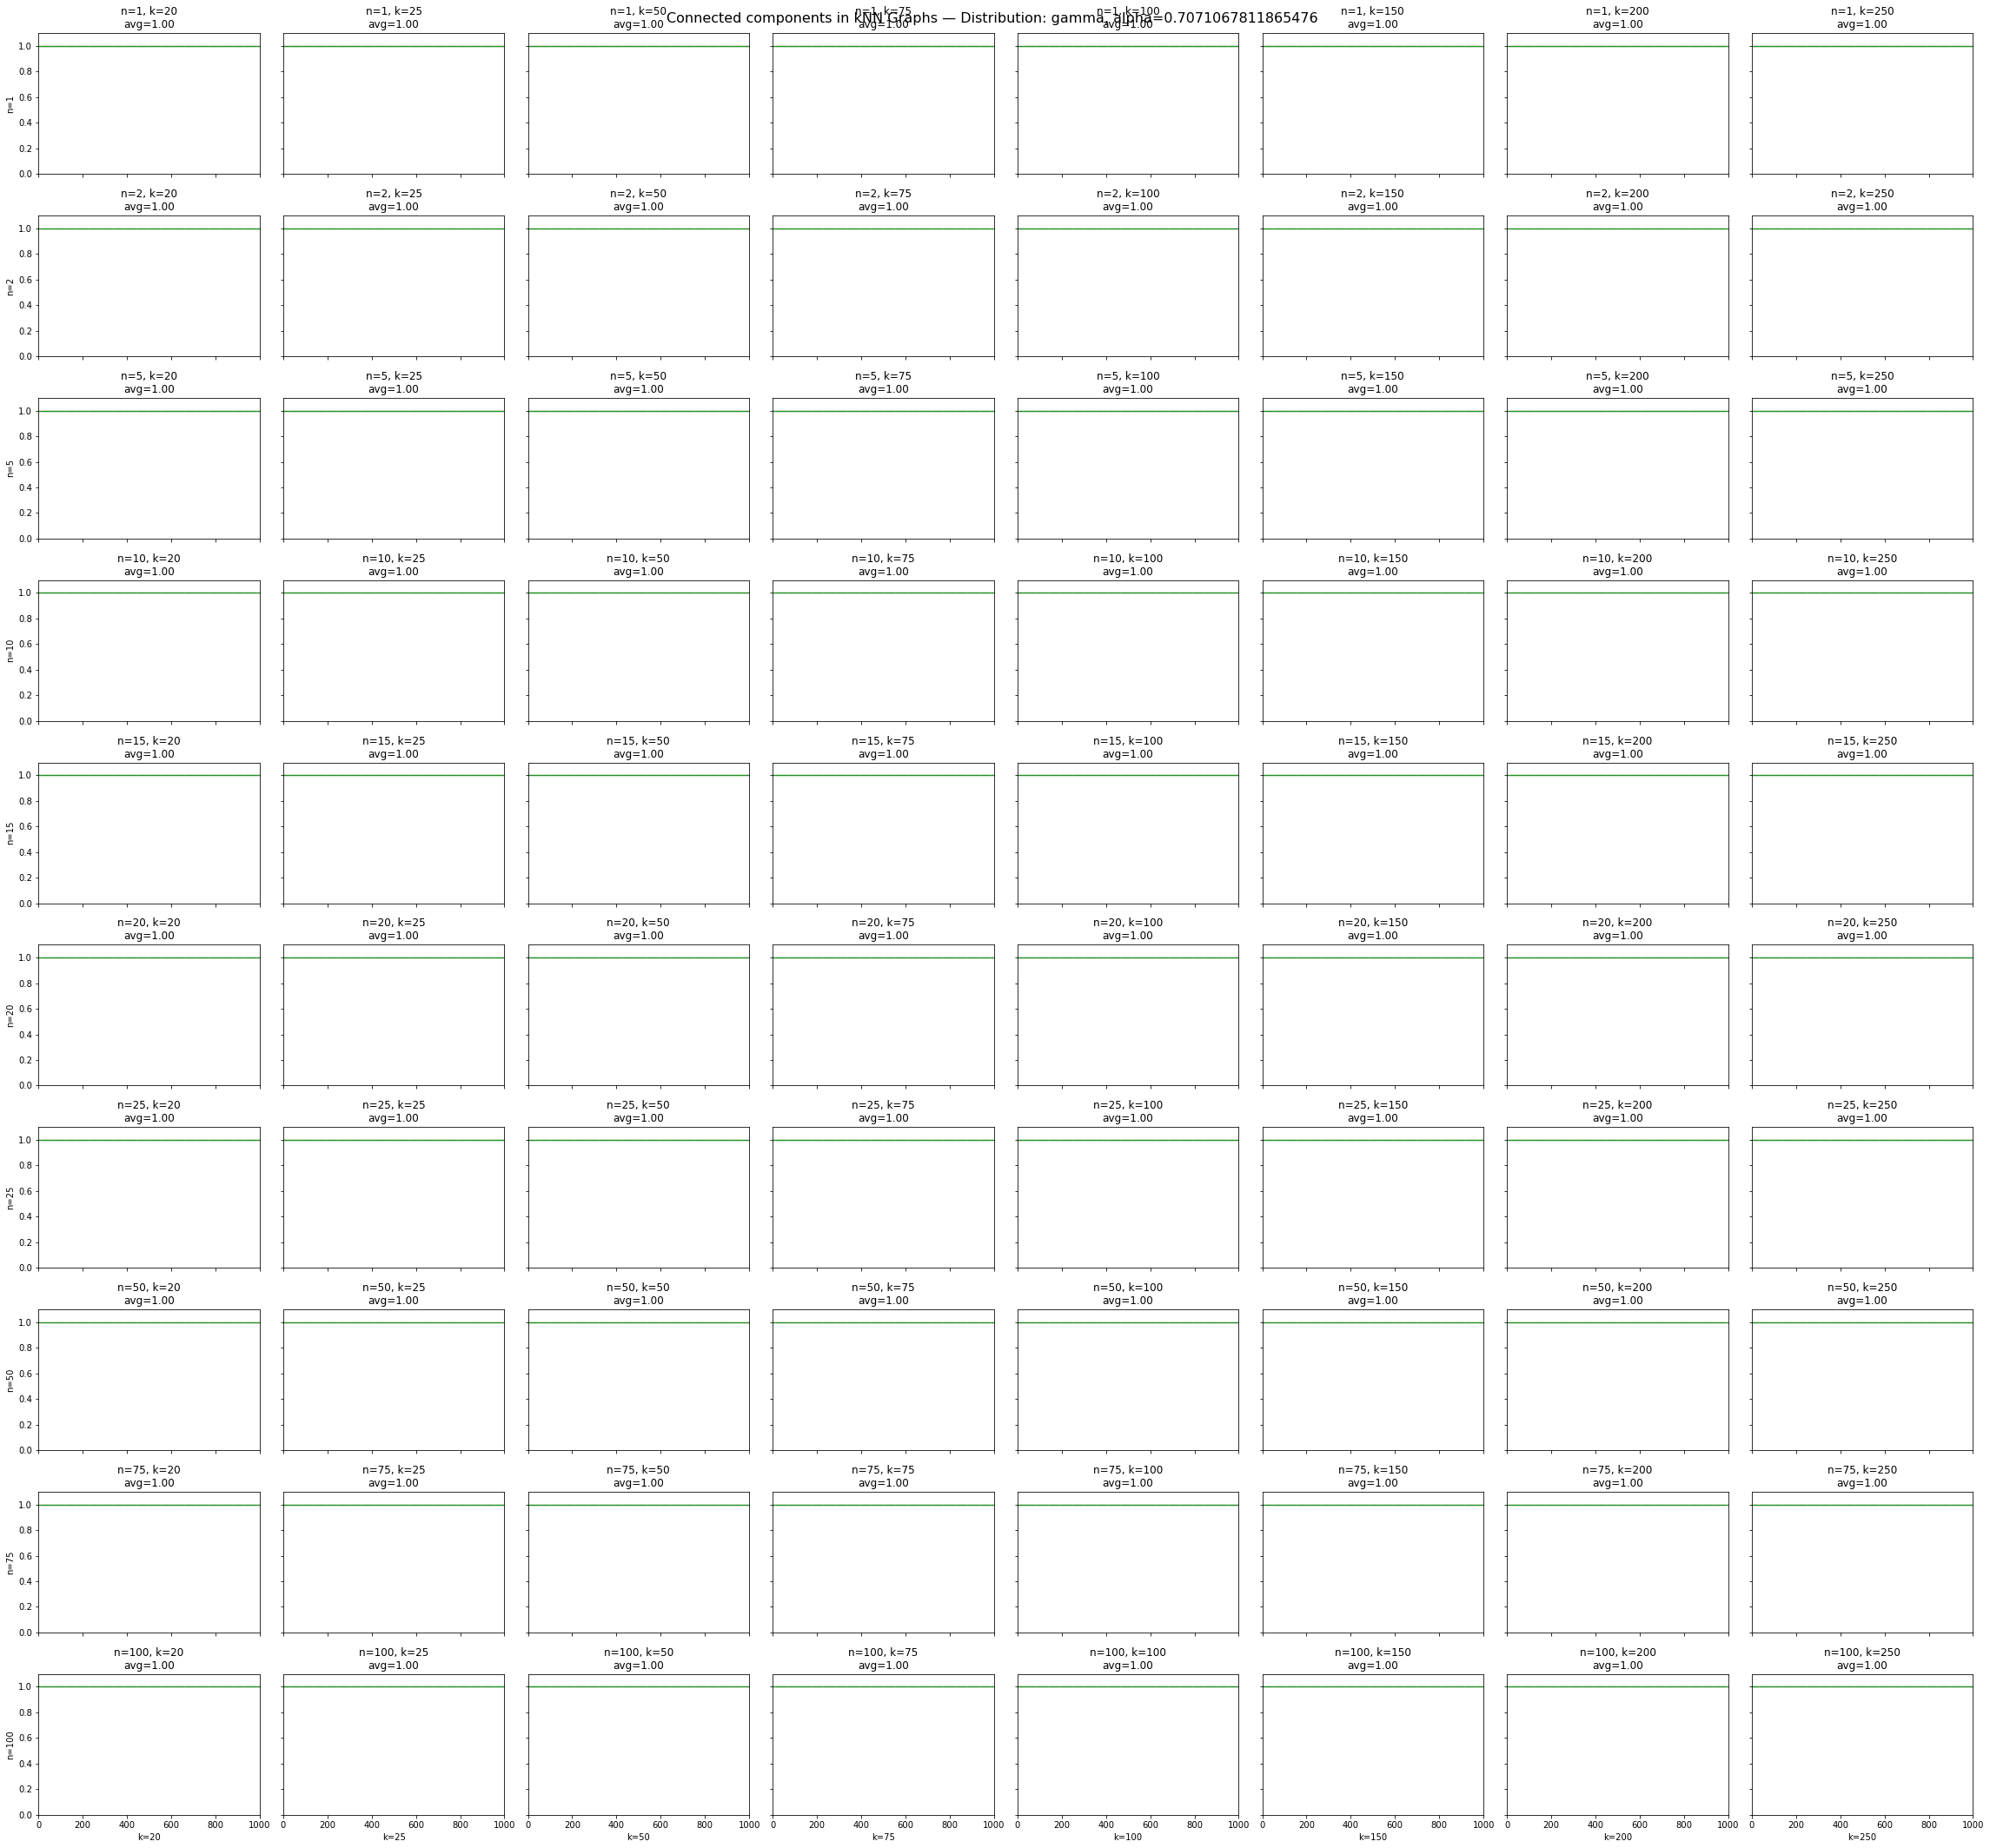

exp sample sizes: 100%|██████████| 10/10 [01:23<00:00,  8.36s/it]


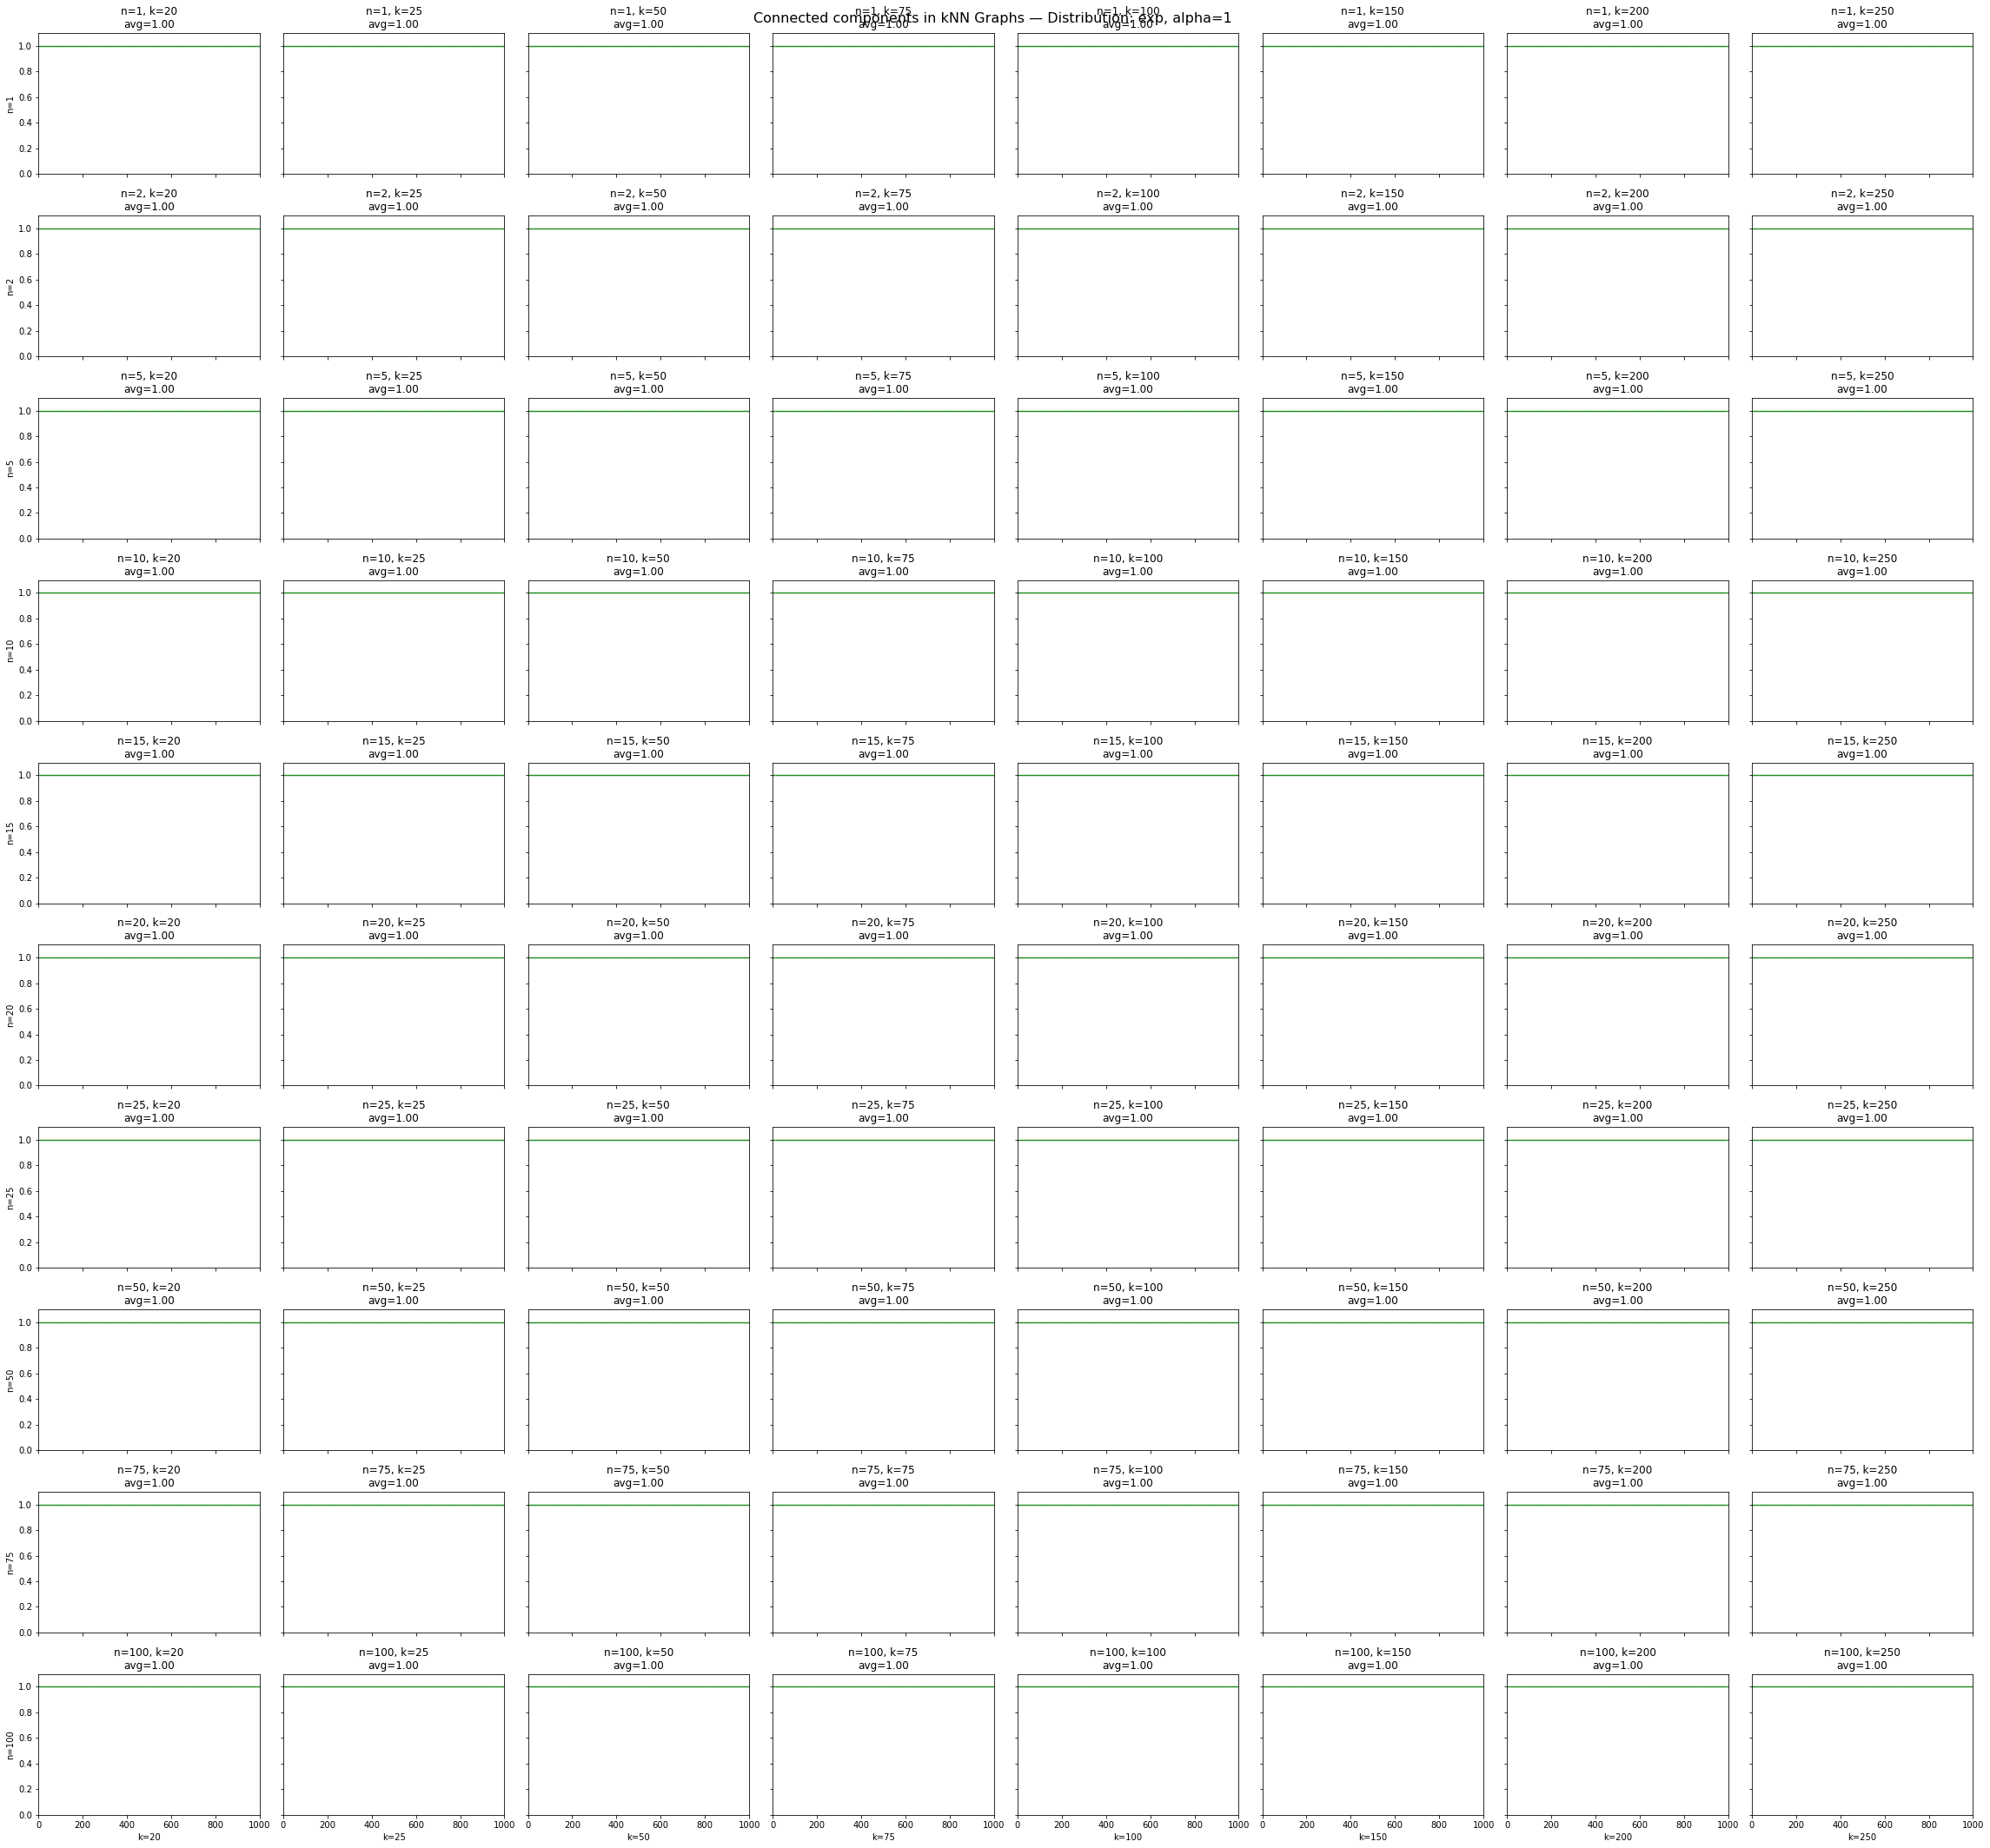

In [11]:
plot_grid_connected_components("gamma", alpha_gamma)
plot_grid_connected_components("exp", alpha_exp)

In [12]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100]
distance_thresholds = [0.1, 1, 2, 3,5]
n_iter = 1000
def plot_grid_chromatic(distance_thresholds):
    dist_configs = [
        ("gamma", 1),
        ("exp", 3)
    ]


    for dist_name, alpha in dist_configs:
        fig, axes = plt.subplots(
            nrows=len(n_samples),
            ncols=len(distance_thresholds),
            figsize=(4 * len(distance_thresholds), 3 * len(n_samples)),
            sharex=True, sharey=True
        )
        fig.suptitle(f"Chromatic number in Distance Graphs — {dist_name}, alpha={alpha}", fontsize=16)

        for i, n in enumerate(tqdm(n_samples, desc=f"{dist_name} sample sizes")):
            for j, d in enumerate(distance_thresholds):
                mis_sizes = []
                for _ in range(n_iter):
                    data = generate_sample(dist_name, alpha=alpha, size=n)
                    mis_sizes.append(chromatic_number_interval_graph(data, d))

                ax = axes[i, j]
                ax.plot(mis_sizes, color="purple", alpha=0.3, marker='.', linestyle='None', markersize=1)
                avg_mis = np.mean(mis_sizes)
                ax.set_title(f"n={n}, d={d}\navg={avg_mis:.2f}")
                ax.set_xlim(0, n_iter)
                ax.set_ylim(0, n + 2)
                
                ax.set_ylim(0, 10)
                
                if j == 0:
                    ax.set_ylabel(f"n={n}")
                if i == len(n_samples) - 1:
                    ax.set_xlabel(f"d={d}")

        plt.tight_layout()
        plt.show()


gamma sample sizes: 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]


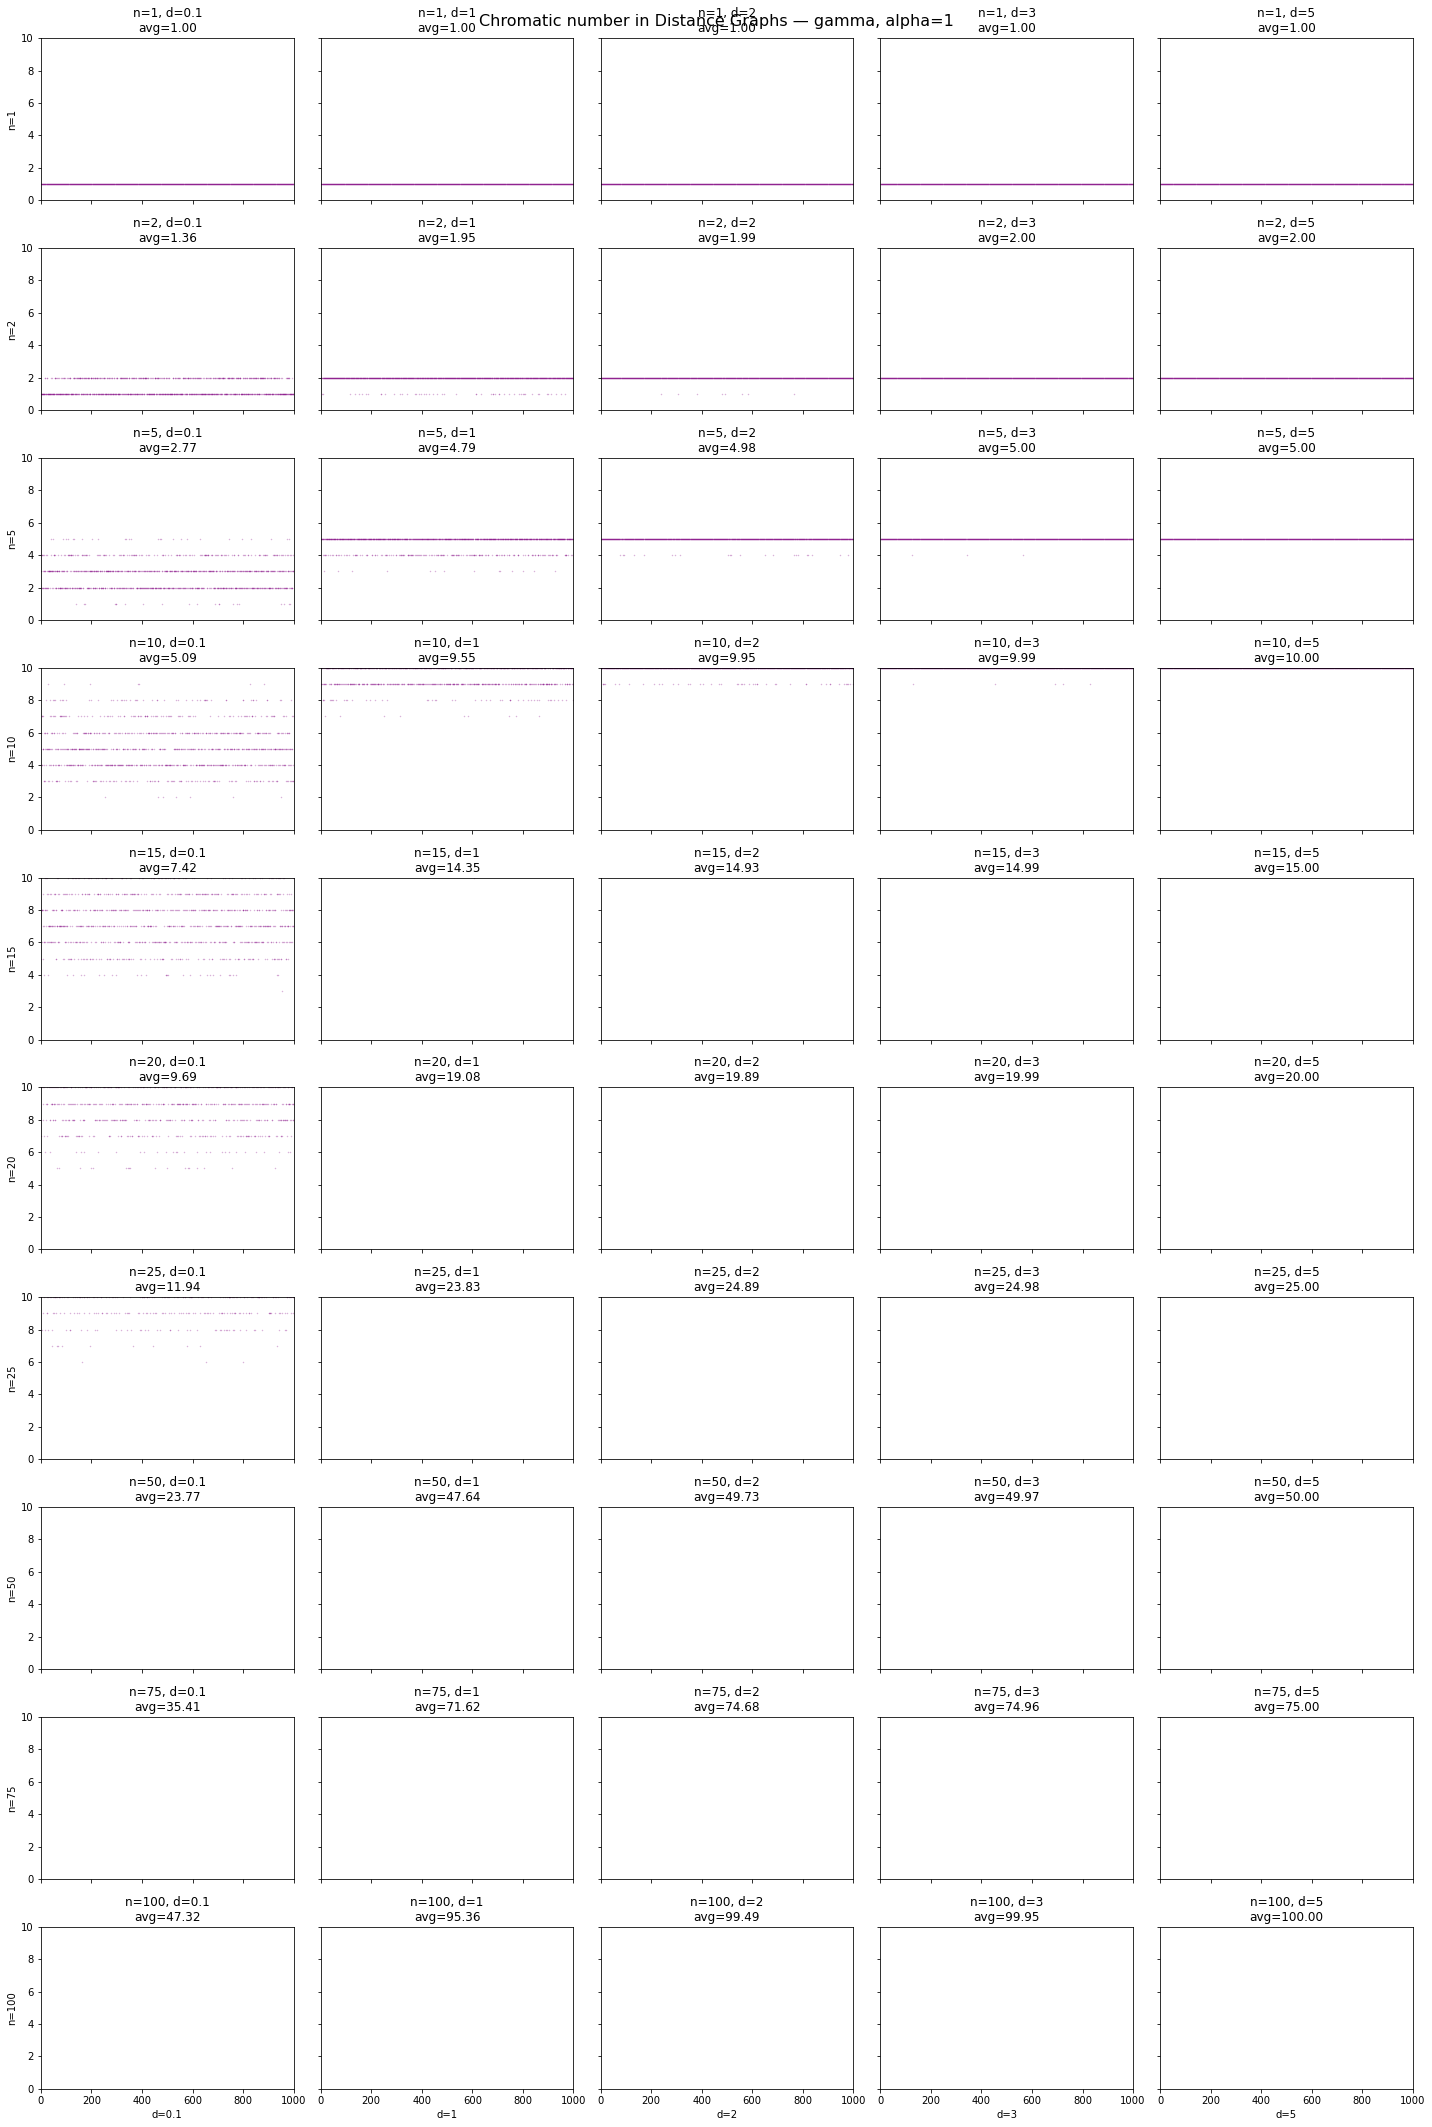

exp sample sizes: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


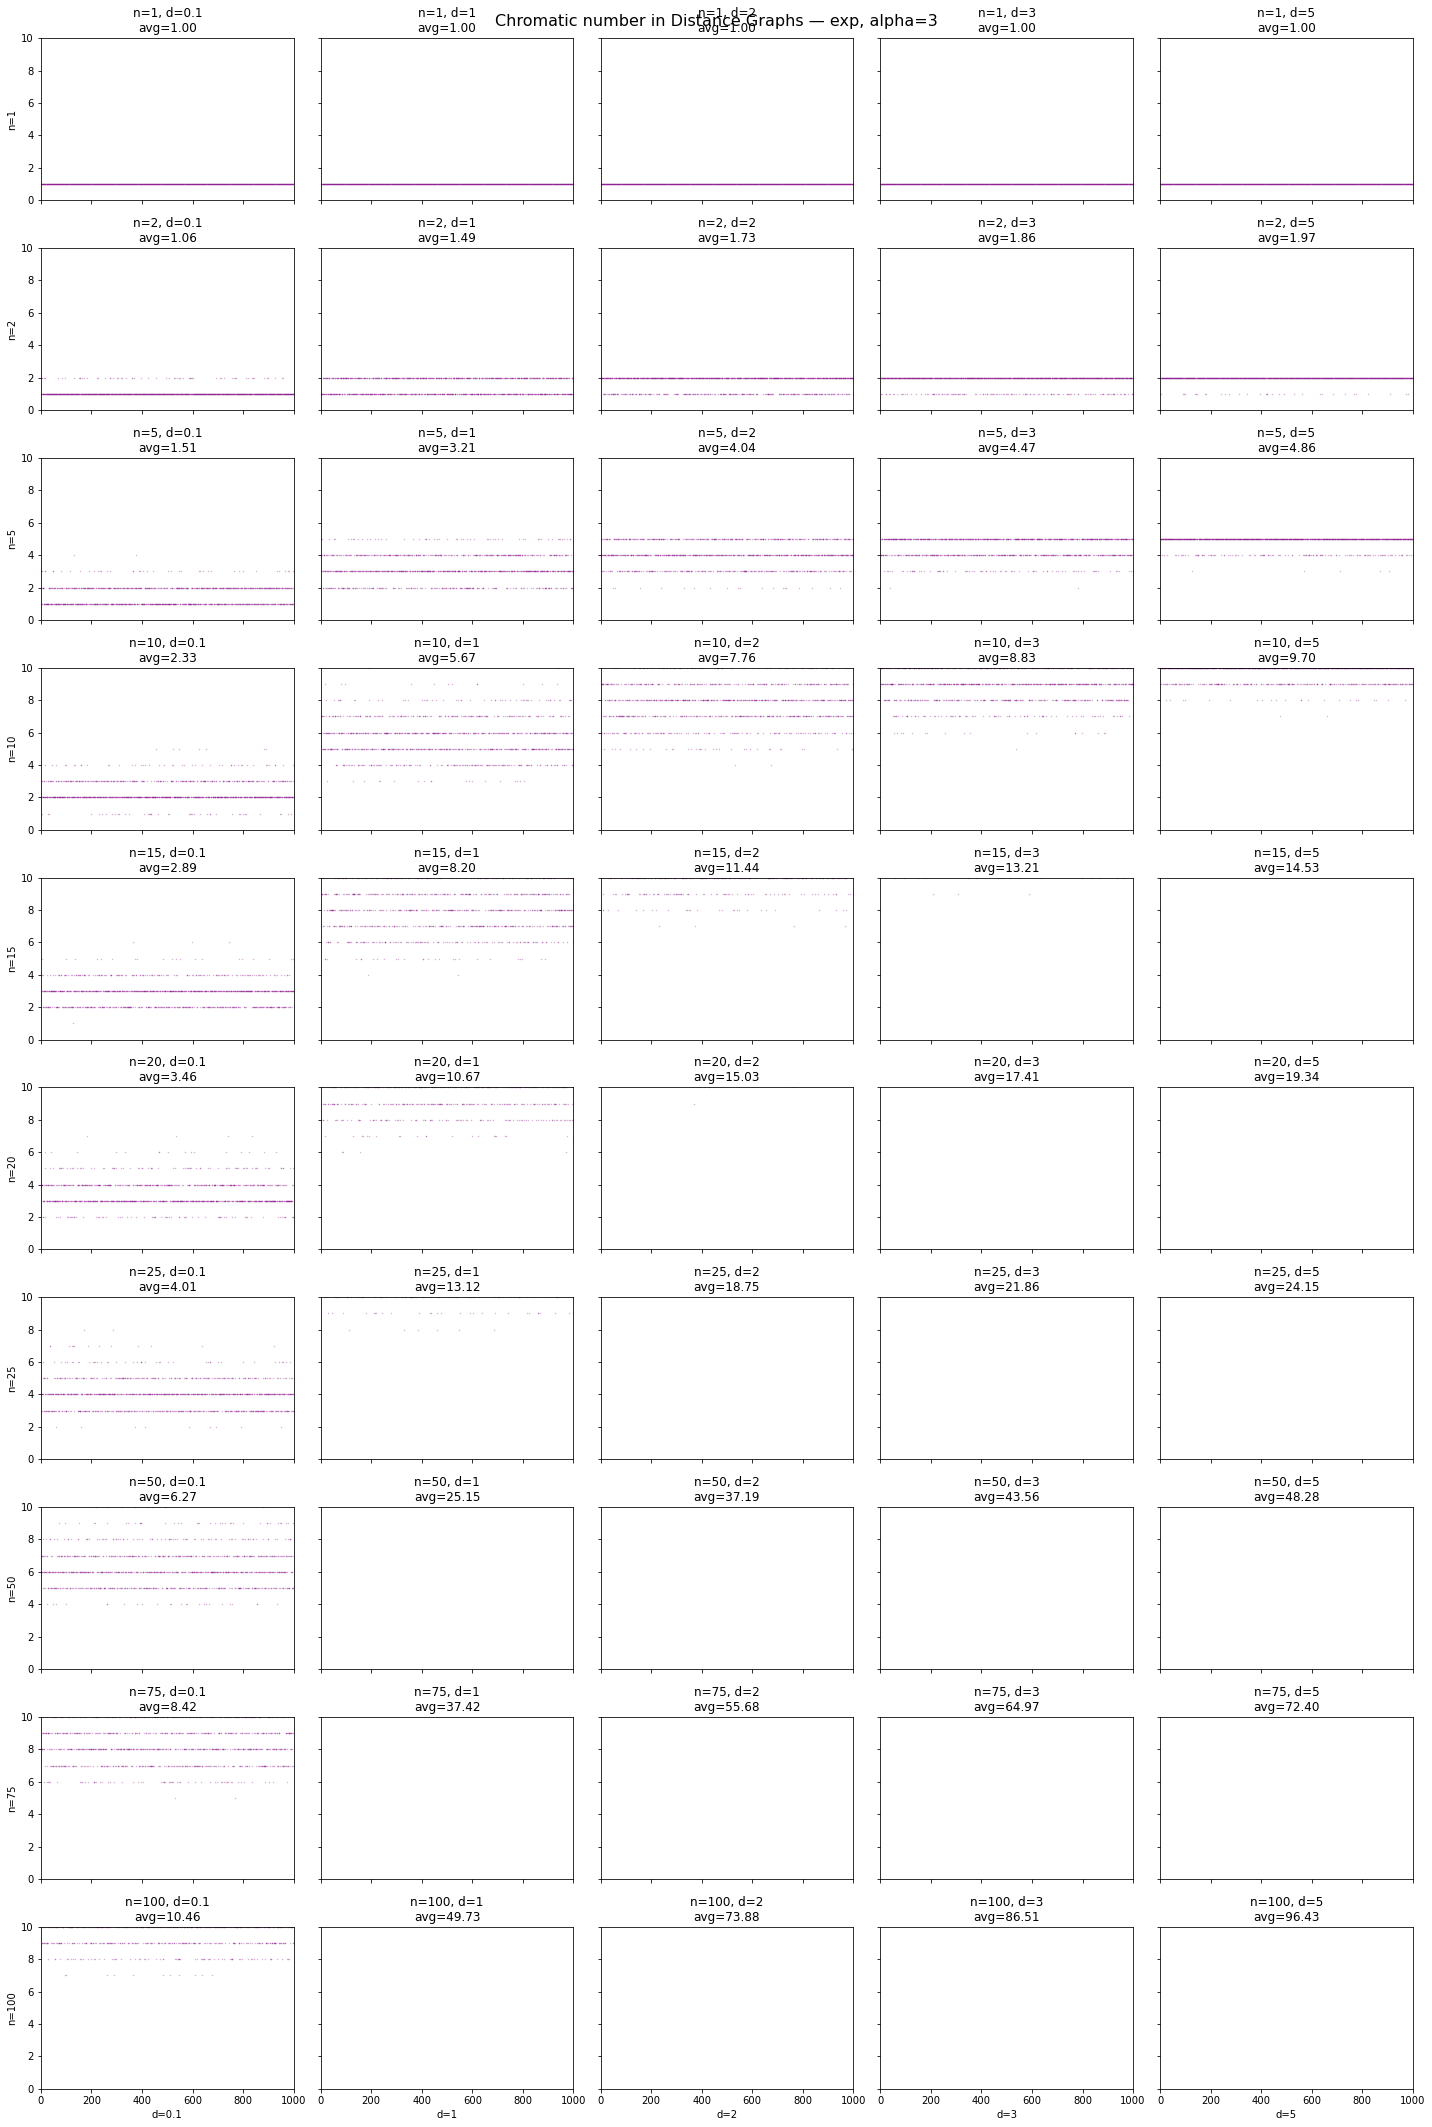

In [13]:
plot_grid_chromatic(distance_thresholds)

# Исследование зависимости числовой характеристики T от параметров процедуры построения графа и размера выборки


kNN k values: 100%|██████████| 5/5 [00:24<00:00,  4.82s/it]


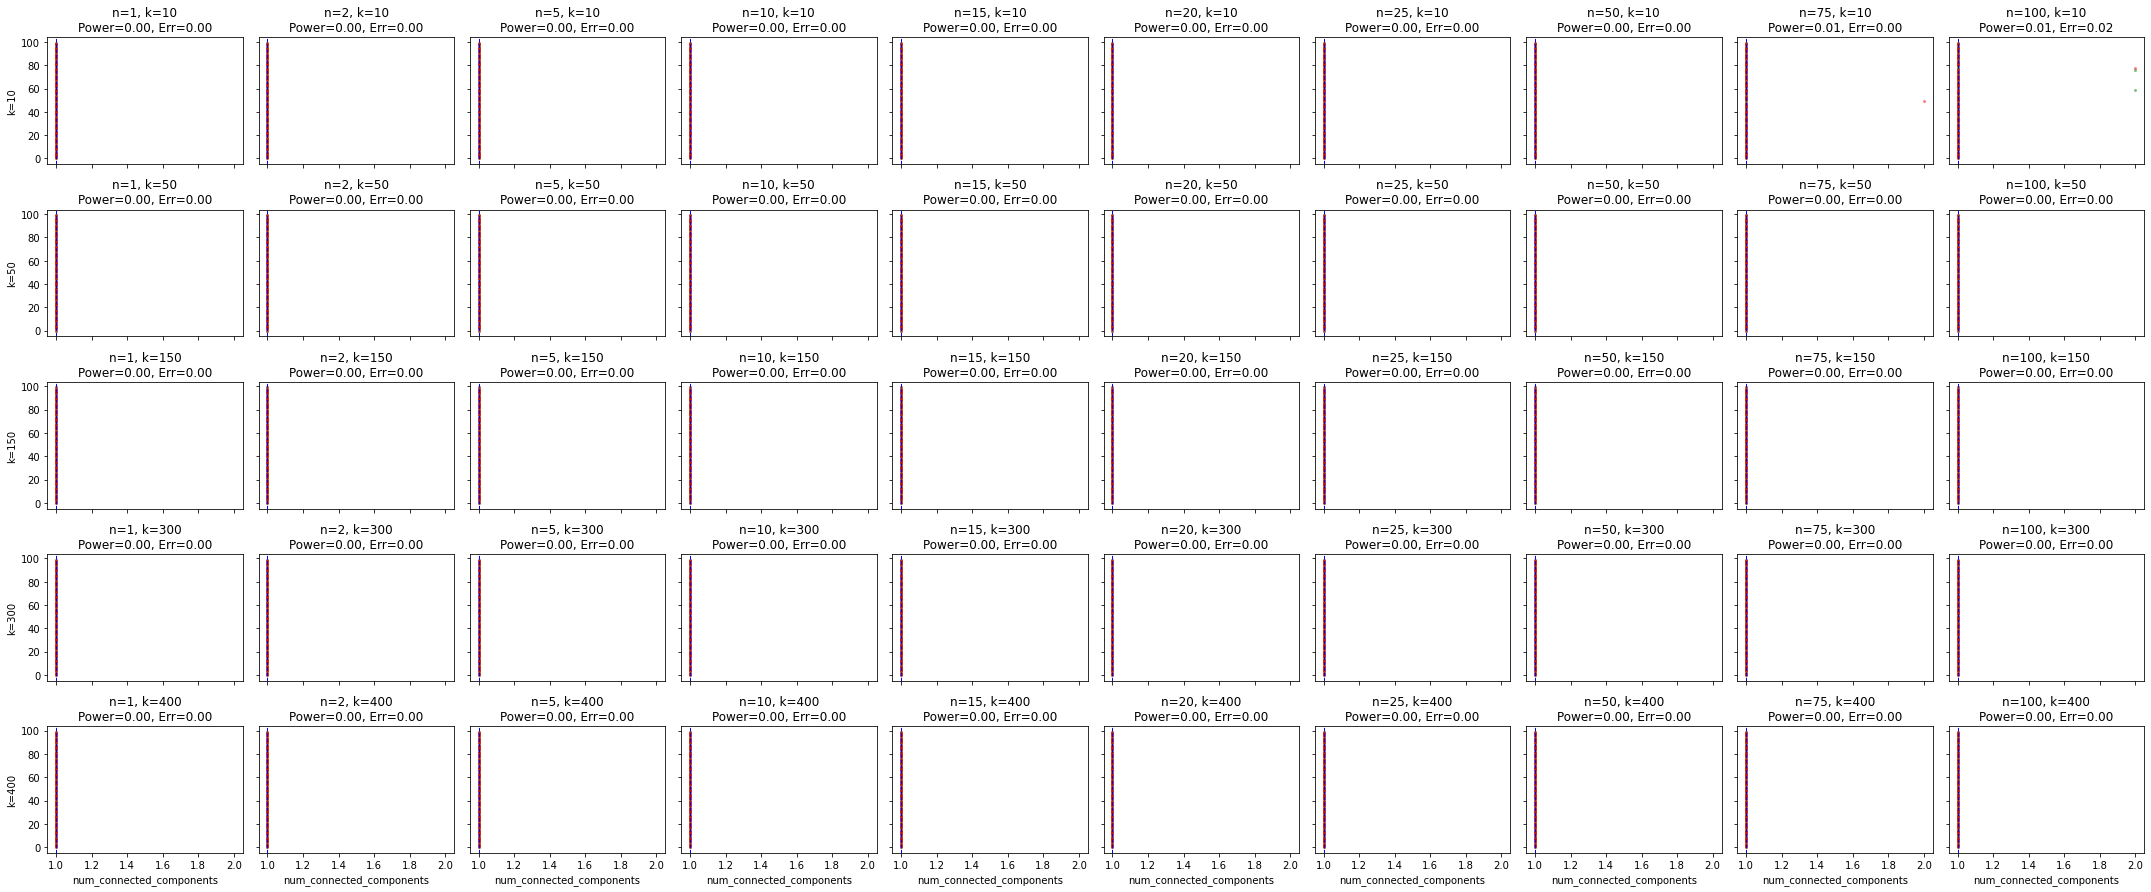

In [17]:
def generate_h_dist(dist: str, alpha: float, n_samples: int, sample_size: int):
    return [generate_sample(dist, alpha, sample_size) for _ in range(n_samples)]

def generate_a_stat(h0_samples, h1_samples, calculation, graph_builder, graph_param, alpha):
    h0_T = [calculation(graph_builder(sample, graph_param)) for sample in h0_samples]
    h1_T = [calculation(graph_builder(sample, graph_param)) for sample in h1_samples]

    threshold = np.quantile(h0_T, 1 - alpha)  # правосторонний критерий
    error = np.mean([t > threshold for t in h0_T])
    power = np.mean([t > threshold for t in h1_T])
    return [threshold], power, error

k_list = [10, 50, 150, 300, 400]
n_iter = 100
alpha = 0.055

fig, axes = plt.subplots(
    nrows=len(k_list), ncols=len(n_samples),
    figsize=(3 * len(n_samples), 2.5 * len(k_list)),
    sharex=True, sharey=True
)

for i, k in enumerate(tqdm(k_list, desc="kNN k values")):
    for j, n in enumerate(n_samples):
        h0 = generate_h_dist("gamma", alpha_gamma, n_iter, n)
        h1 = generate_h_dist("exp", alpha_exp, n_iter, n)

        threshold_set, power, error = generate_a_stat(
            h0, h1,
            calculation=num_connected_components,
            graph_builder=build_knn_graph,
            graph_param=k,
            alpha=alpha
        )

        gamma_h0 = [num_connected_components(build_knn_graph(sample, k)) for sample in h0]
        gamma_h1 = [num_connected_components(build_knn_graph(sample, k)) for sample in h1]

        ax = axes[i, j]
        ax.scatter(gamma_h0, range(n_iter), color="green", alpha=0.4, s=4, label="H0: Gamma")
        ax.scatter(gamma_h1, range(n_iter), color="red", alpha=0.4, s=4, label="H1: Exp")
        for thr in threshold_set:
            ax.axvline(x=thr, color='blue', linestyle='--', linewidth=1)

        ax.set_title(f"n={n}, k={k}\nPower={power:.2f}, Err={error:.2f}")
        if i == len(k_list) - 1:
            ax.set_xlabel("num_connected_components")
        if j == 0:
            ax.set_ylabel(f"k={k}")

plt.tight_layout()
plt.show()
n_samples_list = [1, 10, 20, 150, 250, 500,700,  1000, 1200]
d_list = [0.0001,0.0005, 0.001,0.005, 0.01,0.05, 0.1, 1, 2]
n_iter = 100
alpha = 0.055
